#### Objective
* Preparing data for training the model.
* Transforming all the categorical and numerical variables by imputing missing values, engineering outliers, and one-hot encoding categorical variables.

In [503]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statistics import mode

In [504]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [505]:
%%javascript 
//Disable autoscrolling to see entire graph
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

##### 1. Split the dataset into training and testing set
* Segregate the labels from the main dataframe.
* Divide features and labels into training and testing set with 20% test size.


In [506]:
# Read Rain in Australia Dataset
df_weather = pd.read_pickle("df_weather_2.pkl")

In [507]:
# Separate target variable from data set
X = df_weather.drop(columns=["RainTomorrow"])
y = df_weather['RainTomorrow']

In [508]:
# Display sample rows from training data (X)
X.sample(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month,year,day
6992,Cobar,19.7,34.4,0.0,9.2,NaN,SE,31.0,NE,SE,...,1010.8,1008.3,0.0,3.0,26.0,32.5,0,12,2011,24
59629,Bendigo,14.1,29.3,0.0,NaN,NaN,SSE,31.0,SE,NNW,...,1018.0,1015.7,NaN,NaN,17.6,27.8,0,3,2017,7
134711,AliceSprings,12.1,30.5,0.0,13.6,5.4,SE,48.0,ESE,SE,...,1014.8,1011.0,4.0,7.0,22.6,30.1,0,2,2014,23


In [509]:
# Display sample target lables
y.sample(3)

134964    0
31594     0
116945    0
Name: RainTomorrow, dtype: int8

In [510]:
# Create a training and testing set with 20% of data set to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [511]:
# Number of rows and columns for training data
X_train.shape

(113754, 24)

In [512]:
# Number of rows and columns for testing data
X_test.shape

(28439, 24)

In [513]:
# Number of rows and columns for target variable training data
y_train.shape

(113754,)

In [514]:
# Number of rows and columns for target variable testing data
y_test.shape

(28439,)

##### 2. Impute the missing values in numerical and categorical variables:
* Impute missing values in numerical variables using the best strategy(mean/median). Do it for both training and test set.
* Repeat the above step for categorical features using the mode strategy.

**Impute missing values in training**

In [515]:
# Check missing values in training
df_weather._get_numeric_data().columns
values_missing_train = X_train.isna().sum()
values_missing_train = values_missing_train[values_missing_train>0]
values_missing_train

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustDir       7407
WindGustSpeed     7367
WindDir9am        7978
WindDir3pm        3008
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
dtype: int64

In [516]:
# Retrieve columns that need to be imputed 
columns_missing_train = values_missing_train.index
columns_missing_train

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm'],
      dtype='object')

In [517]:
# Select numerical and categorical columns (based on those with missing data)
numerical_train_columns   = list(X_train[columns_missing_train]._get_numeric_data().columns)
categorical_train_columns = list(set(X_train[columns_missing_train].columns) - set(numerical_train_columns))

In [518]:
numerical_train_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [519]:
categorical_train_columns

['WindDir3pm', 'WindDir9am', 'WindGustDir']

In [520]:
# For each column with missing values in training, impute 
# Use median to impute to prevent outliers from skewing the imputed value
for column in numerical_train_columns:
    median_value= X_train[column].median()    
    X_train[column].fillna(median_value, inplace=True)

In [521]:
# Categorical values
# For each column with missing values in training, impute 
# Use mode to impute since it's a categorical variable
for column in categorical_train_columns:      
    mode_value= mode(X_train[column].dropna())
    X_train[column].fillna(mode_value, inplace=True)

In [522]:
# Check missing values for categorical RainToday in train
X_train['RainToday'].value_counts()

 0    87474
 1    25141
-1     1139
Name: RainToday, dtype: int64

In [523]:
# For missing values we will use the most frequent (0)
X_train['RainToday'] = X_train['RainToday'].apply(lambda rain_today: rain_today if(rain_today>=0) else 0)

**Impute missing values in testing**

In [524]:
# Check missing values in test
values_missing_test = X_test.isna().sum()
values_missing_test = values_missing_test[values_missing_test>0]
values_missing_test

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustDir       1923
WindGustSpeed     1903
WindDir9am        2035
WindDir3pm         770
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
dtype: int64

In [525]:
# Retrieve columns that need to be imputed 
columns_missing_test  = values_missing_test.index
# Select numerical and categorical columns (based on those with missing data)
numerical_test_columns   = list(X_test[columns_missing_test]._get_numeric_data().columns)
categorical_test_columns = list(set(X_test[columns_missing_test].columns) - set(numerical_test_columns))

In [526]:
numerical_test_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [527]:
categorical_test_columns

['WindDir3pm', 'WindDir9am', 'WindGustDir']

In [528]:
# For each column with missing values in training, impute 
# Use median to impute to prevent outliers from skewing the imputed value
for column in numerical_test_columns:
    median_value= X_test[column].median()
    X_test[column].fillna(median_value, inplace=True)

# Categorical values
# For each column with missing values in training, impute 
# Use mode to impute since it's a categorical variable
for column in categorical_test_columns:
    # Get mode of column excluding nan values
    mode_value= mode(X_test[column].dropna())    
    X_test[column].fillna(mode_value, inplace=True)

In [529]:
# Check missing values for categorical variable RainToday in test
X_test['RainToday'].value_counts()

 0    21858
 1     6314
-1      267
Name: RainToday, dtype: int64

In [530]:
# For missing values we will use the most frequent (0)
X_test['RainToday'] = X_test['RainToday'].apply(lambda rain_today: rain_today if(rain_today>=0) else 0)

In [531]:
# Check train data for null values
X_train.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
month            0
year             0
day              0
dtype: int64

In [532]:
# Check test data for null values
X_test.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
month            0
year             0
day              0
dtype: int64

At this point the missing data has been imputed either by using the mean for numerical or the mode for categorical variables.

##### 3 .Engineer Outliers:
* Pick a removal strategy to cap the max values in numerical variables. You can use the upper bound calculated from the IQR. Do it for both training and test set.
* Check the summary statistics again to be sure.

In [533]:
# Get name of numerical and categorical columns
numerical_columns   = list(X_train._get_numeric_data().columns)
categorical_columns = list(set(X_train.columns) - set(numerical_columns))
print(f"Numerical Columns:\n{numerical_columns}")
print(f"Categorical Columns:\n{categorical_columns}")

Numerical Columns:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'month', 'year', 'day']
Categorical Columns:
['Location', 'WindDir3pm', 'WindDir9am', 'WindGustDir']


In [534]:
# Sample numerical columns
X_train[numerical_columns].sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month,year,day
41854,17.3,24.0,0.0,4.8,8.5,39.0,4.0,11.0,80.0,72.0,1022.5,1019.2,5.0,5.0,21.3,23.2,0,4,2010,22
128224,6.9,17.4,0.0,4.4,11.1,30.0,9.0,19.0,69.0,50.0,1020.3,1016.9,5.0,5.0,11.9,17.1,0,10,2012,29
130272,11.2,25.5,0.0,4.8,8.5,39.0,6.0,20.0,58.0,46.0,1019.9,1016.8,5.0,5.0,17.4,24.0,0,1,2010,15


In [535]:
# Sample categorical values
X_train[categorical_columns].sample(3)

,Location,WindDir3pm,WindDir9am,WindGustDir
48503,Tuggeranong,ENE,N,NNE
55596,Ballarat,NNE,NNE,NE
85431,Cairns,SE,S,SE


In [536]:
# Columns with ouliers (as determined in Milestone 3)
outlier_columns = ['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm']

Check distribution and choose a quantile that limits the number of records that are capped

<AxesSubplot:>

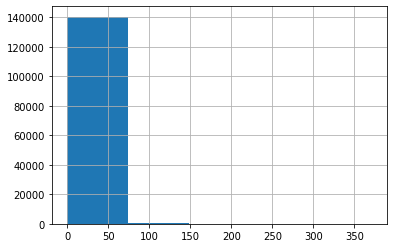

In [537]:
# Show distribution 
df_weather.Rainfall.hist(bins=5)

In [538]:
# Show quantile
df_weather['Rainfall'].describe()

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [539]:
# Show quantile
df_weather['Rainfall'].quantile(.9998)

166.9685600000026

In [540]:
# Based on column see how many records would be cut off with selected quantile
column = 'Rainfall'
quantile_limit = .9998
df_weather[df_weather[column]>df_weather[column].quantile(quantile_limit)][column].shape

(29,)

<AxesSubplot:>

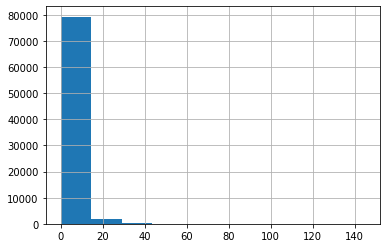

In [541]:
# Show distribution 
df_weather.Evaporation.hist(bins=10)

In [542]:
# Show quantile
df_weather['Evaporation'].describe()

count    81350.000000
mean         5.469824
std          4.188537
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

In [543]:
df_weather['Evaporation'].quantile(.998)
# Based on column see how many records would be cut off with selected quantile

33.4

In [544]:
column = 'Evaporation'
quantile_limit = .998
df_weather[df_weather[column]>df_weather[column].quantile(quantile_limit)][column].shape

(162,)

<AxesSubplot:>

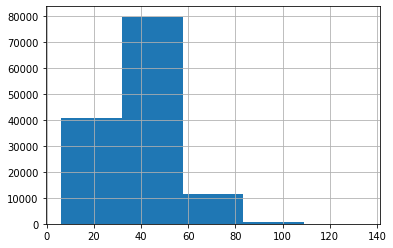

In [545]:
# Show distribution 
df_weather.WindGustSpeed.hist(bins=5)

In [546]:
# Show quantile
df_weather['WindGustSpeed'].describe()

count    132923.000000
mean         39.984292
std          13.588801
min           6.000000
25%          31.000000
50%          39.000000
75%          48.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

In [547]:
# Show quantile
df_weather['WindGustSpeed'].quantile(.99)

81.0

In [548]:
# Based on column see how many records would be cut off with selected quantile
column = 'WindGustSpeed'
quantile_limit = .99
df_weather[df_weather[column]>df_weather[column].quantile(quantile_limit)][column].shape

(1074,)

<AxesSubplot:>

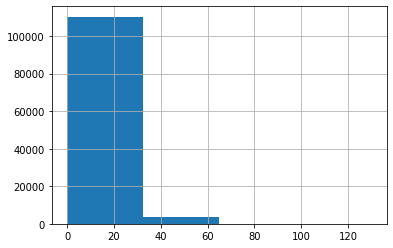

In [549]:
# Show distribution 
X_train.WindSpeed9am.hist(bins=4)

In [550]:
# Show quantile
X_train['WindSpeed9am'].quantile(.998)

50.0

In [551]:
# Based on column see how many records would be cut off with selected quantile
column = 'WindSpeed9am'
quantile_limit = .998
df_weather[df_weather[column]>df_weather[column].quantile(quantile_limit)][column].shape

(206,)

<AxesSubplot:>

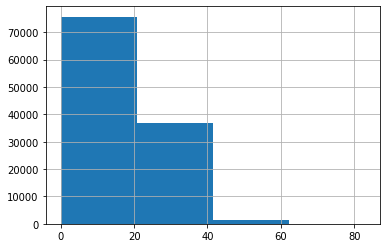

In [552]:
# Show distribution 
X_train.WindSpeed3pm.hist(bins=4)

In [553]:
# Show quantile
X_train['WindSpeed3pm'].quantile(.99)

43.0

In [554]:
# Based on column see how many records would be cut off with selected quantile
column = 'WindSpeed3pm'
quantile_limit = .99
df_weather[df_weather[column]>df_weather[column].quantile(quantile_limit)][column].shape

(1272,)

At this point we have all the quartiles to cap to for each of the outlier variables

In [555]:
outlier_columns

['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

In [556]:
#Rainfall, #Evaporation, #WindGustSpeed, #WindSpeed9am, #WindSpeed3pm
quantile_values = [.9998,.998, .99, .998, .99]

In [557]:
# For each of the oulier variables, cap the max values 
for index in range(len(outlier_columns)):
    column = outlier_columns[index]
    quantile_value = quantile_values[index]
    cap_value = df_weather[column].quantile(quantile_value)
    print(f"{column} capped at {cap_value}")
    # Cap the value in training data
    X_train[column] = X_train[column].apply(lambda value: value if(value<=cap_value) else cap_value)
    # Cap the value in test data
    X_test[column] = X_test[column].apply(lambda value: value if(value<=cap_value) else cap_value)

Rainfall capped at 166.9685600000026
Evaporation capped at 33.4
WindGustSpeed capped at 81.0
WindSpeed9am capped at 50.0
WindSpeed3pm capped at 43.0


In [558]:
X_train[outlier_columns].describe()

,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,2.309840,5.174060,39.808903,13.972405,18.567813
std,8.180738,2.988782,12.830239,8.781576,8.529204
min,0.000000,0.000000,6.000000,0.000000,0.000000
25%,0.000000,4.000000,31.000000,7.000000,13.000000
50%,0.000000,4.800000,39.000000,13.000000,19.000000
75%,0.600000,5.400000,46.000000,19.000000,24.000000
max,166.968560,33.400000,81.000000,50.000000,43.000000


In [559]:
X_test[outlier_columns].describe()

,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm
count,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000
mean,2.347177,5.144319,39.986181,14.022153,18.688421
std,8.179055,2.937258,12.938120,8.879269,8.584316
min,0.000000,0.000000,7.000000,0.000000,0.000000
25%,0.000000,4.000000,31.000000,7.000000,13.000000
50%,0.000000,4.800000,39.000000,13.000000,19.000000
75%,0.600000,5.400000,46.000000,19.000000,24.000000
max,166.968560,33.400000,81.000000,50.000000,43.000000


##### 4. One-Hot encode the categorical variables with sensible column names.
* Hint: You can use a dict vectorizer

In [560]:
df_weather[categorical_columns].sample(6)

,Location,WindDir3pm,WindDir9am,WindGustDir
113709,PearceRAAF,SSE,NW,S
41400,Wollongong,NE,NNE,NE
126880,Hobart,WNW,NNW,NW
5560,BadgerysCreek,N,NNE,NNE
38344,WaggaWagga,SSE,E,SSW
7094,Cobar,SSW,SE,WNW


In [561]:
# Get dummies and concatenate to current dataframe, drop original categorical_columns
X_train_dummies = X_train[categorical_columns]
X_train = pd.concat([X_train,pd.get_dummies(X_train[categorical_columns])], axis=1)
X_train.drop(columns=categorical_columns, inplace=True)

In [562]:
# Get dummies and concatenate to current dataframe, drop original categorical_columns
X_test_dummies = X_test[categorical_columns]
X_test = pd.concat([X_test,pd.get_dummies(X_test[categorical_columns])], axis=1)
X_test.drop(columns=categorical_columns, inplace=True)

In [563]:
# Show number of rows and columns
X_train.shape

(113754, 117)

In [564]:
# Show number of rows and columns
X_test.shape

(28439, 117)

##### 5. Scale the features - Use an appropriate scaler from sklearn to scale both the training and test set.

In [565]:
# Make a copy of original train data for comparison
original_X_train = X_train.copy()
original_X_test = X_test.copy()

In [566]:
# Shrink range of data by putting within a range of 0 and 1
scaler = MinMaxScaler()
# Scale training data
X_train_np = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_np, columns=X_train.columns)
# Scale test data
X_test_np = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_np, columns=X_test.columns)

In [575]:
# Display values of original data
original_X_train.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
110803,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,1,0,0,0,0,0,0,0
87289,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,0,0,0,0,0,0,0
134949,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [576]:
# Display values of scaled data
X_train.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,0.524941,0.517958,0.001198,0.143713,0.586207,0.466667,0.40,0.651163,0.65,0.55,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.726841,0.646503,0.011978,0.179641,0.434483,0.360000,0.14,0.441860,0.71,0.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.425178,0.775047,0.000000,0.341317,0.848276,0.333333,0.30,0.255814,0.06,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [582]:
# Display values of scaled data
X_test.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,0.649123,0.651575,0.000000,0.107784,0.776224,0.351351,0.22,0.441860,0.626263,0.606061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.383459,0.364173,0.004791,0.023952,0.594406,0.527027,0.34,0.511628,0.797980,0.545455,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.466165,0.383858,0.087442,0.143713,0.594406,0.324324,0.26,0.209302,0.696970,0.606061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


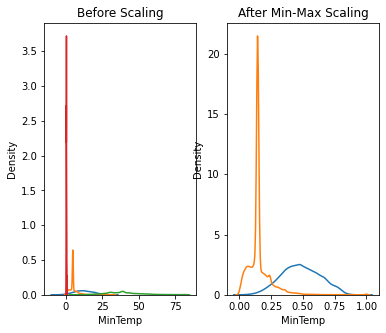

In [581]:
# Plot before and after of some sample values to confirm
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(original_X_train['MinTemp'], ax=ax1)
sns.kdeplot(original_X_train['Evaporation'], ax=ax1)
sns.kdeplot(original_X_train['WindGustSpeed'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train['MinTemp'], ax=ax2)
sns.kdeplot(X_train['Evaporation'], ax=ax2)
sns.kdeplot(X_train['WindGustSpeed'], ax=ax1)
plt.show()

In [586]:
# Save data
X_train.to_pickle("X_train.pkl")
X_test.to_pickle("X_test.pkl")
y_train.to_pickle("y_train.pkl")
y_test.to_pickle("y_test.pkl")